In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

from modules.categorical_data_coding import code_data
from modules.model_runer import find_n_neighbors, test_model
from modules.classes_scatterplot import draw_classes_scatterplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./prepared_datasets/100_Que_classification.csv')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,30.975315,30.319231,30.670246,30.899062,30.761777,30.761792,29.281708,28.701923,30.578738,31.250154,...,18.265300,18.982415,18.677331,18.616246,18.478962,18.768877,18.662092,18.952008,19.013123,0Ca/100Que
1,19.119938,19.425054,19.516669,18.601185,17.990800,18.616415,18.555431,18.173946,18.891162,18.936977,...,31.434223,32.242938,33.250054,32.883869,33.372185,33.158600,32.792315,33.295931,33.616346,0Ca/100Que
2,33.158662,32.487277,31.861692,31.785408,31.648023,32.670438,33.906354,34.577769,33.708085,32.517900,...,31.816346,32.533562,32.365677,31.450192,31.389108,31.526523,31.724838,31.602854,32.152169,0Ca/100Que
3,31.419785,31.084100,32.243715,33.342431,32.976246,31.984362,31.358777,31.663992,27.376308,25.667323,...,28.246369,26.827385,23.150000,24.691115,27.666631,28.002346,24.447062,20.083077,18.984492,0Ca/100Que
4,18.633508,17.962123,18.435138,18.847154,18.770869,19.716985,20.785100,20.632515,19.579631,18.786246,...,31.069892,31.344608,31.970223,32.260138,31.695554,31.192069,31.665085,30.871700,29.132215,0Ca/100Que


In [4]:
list(df.target.unique())

['0Ca/100Que', '10Ca/100Que', '100Ca/100Que']

In [5]:
code_data(df, 'target')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,30.975315,30.319231,30.670246,30.899062,30.761777,30.761792,29.281708,28.701923,30.578738,31.250154,...,18.265300,18.982415,18.677331,18.616246,18.478962,18.768877,18.662092,18.952008,19.013123,0
1,19.119938,19.425054,19.516669,18.601185,17.990800,18.616415,18.555431,18.173946,18.891162,18.936977,...,31.434223,32.242938,33.250054,32.883869,33.372185,33.158600,32.792315,33.295931,33.616346,0
2,33.158662,32.487277,31.861692,31.785408,31.648023,32.670438,33.906354,34.577769,33.708085,32.517900,...,31.816346,32.533562,32.365677,31.450192,31.389108,31.526523,31.724838,31.602854,32.152169,0
3,31.419785,31.084100,32.243715,33.342431,32.976246,31.984362,31.358777,31.663992,27.376308,25.667323,...,28.246369,26.827385,23.150000,24.691115,27.666631,28.002346,24.447062,20.083077,18.984492,0
4,18.633508,17.962123,18.435138,18.847154,18.770869,19.716985,20.785100,20.632515,19.579631,18.786246,...,31.069892,31.344608,31.970223,32.260138,31.695554,31.192069,31.665085,30.871700,29.132215,0


# Distance-based algorithms

In [6]:
scaler = MinMaxScaler()

In [7]:
distance_based_df = scaler.fit_transform(df.values)
distance_based_df = pd.DataFrame(distance_based_df)
distance_based_df.columns = df.columns
distance_based_df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,0.741526,0.712329,0.734806,0.746112,0.732566,0.726193,0.683955,0.662737,0.730967,0.746427,...,0.350894,0.362176,0.361264,0.365354,0.367895,0.380419,0.369037,0.379956,0.384818,0.0
1,0.390440,0.396836,0.408095,0.377425,0.360751,0.375241,0.369716,0.349547,0.381695,0.385534,...,0.749342,0.753636,0.786670,0.795590,0.798946,0.806978,0.785269,0.797197,0.811052,0.0
2,0.806184,0.775115,0.769706,0.772685,0.758368,0.781345,0.819440,0.837534,0.824485,0.783584,...,0.760904,0.762216,0.760853,0.752358,0.741550,0.758598,0.753824,0.747948,0.768316,0.0
3,0.754688,0.734479,0.780896,0.819364,0.797038,0.761521,0.744806,0.750854,0.635266,0.582797,...,0.652888,0.593765,0.491829,0.548540,0.633812,0.654130,0.539444,0.412857,0.383982,0.0
4,0.376035,0.354470,0.376415,0.384799,0.383462,0.407043,0.435037,0.422686,0.402269,0.381116,...,0.738318,0.727117,0.749309,0.776781,0.750420,0.748683,0.752064,0.726680,0.680171,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,0.820245,0.769862,0.752324,0.789206,0.800624,0.828572,0.817256,0.787202,0.789880,0.789002,...,0.773959,0.769096,0.792157,0.803097,0.782746,0.812546,0.797996,0.781356,0.765319,1.0
2088,0.776049,0.773925,0.808729,0.813997,0.769615,0.745768,0.768619,0.777757,0.796808,0.780590,...,0.570909,0.687203,0.761062,0.793065,0.795197,0.800876,0.811570,0.804968,0.801036,1.0
2089,0.716036,0.719661,0.777978,0.797160,0.738160,0.751585,0.788822,0.781931,0.791426,0.801699,...,0.471737,0.472877,0.495226,0.499136,0.507339,0.506504,0.461516,0.474829,0.498719,1.0
2090,0.494257,0.480685,0.479047,0.477030,0.497465,0.500788,0.490296,0.514660,0.506063,0.490963,...,0.797774,0.774316,0.746093,0.796925,0.814360,0.859855,0.846803,0.810914,0.782505,1.0


In [8]:
X, y = np.array(distance_based_df.drop('target', axis=1)), np.array(df['target'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## k-Nearest Neighbors

In [10]:
knn = KNeighborsClassifier()

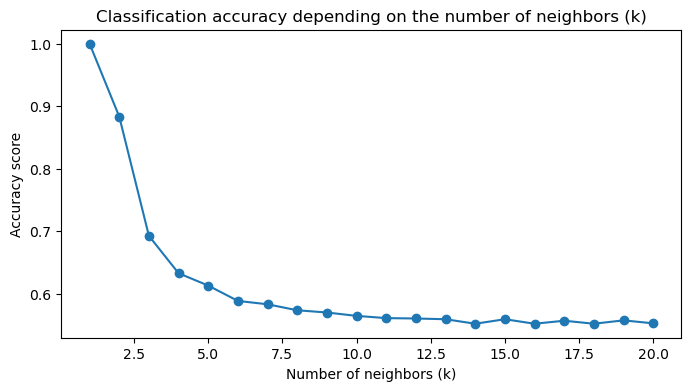

In [11]:
find_n_neighbors(knn, X_train, y_train, 21)

In [12]:
knn.set_params(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

 CV Scores: [0.55847255 0.55263158 0.5861244  0.57177033]
 CV Mean score: 0.5672497173721894


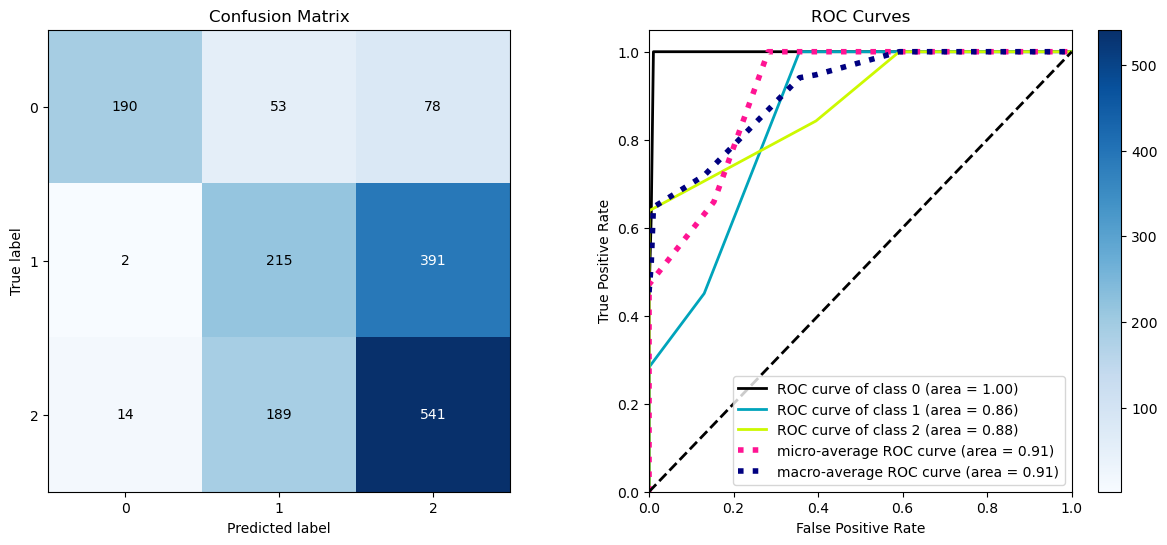

In [13]:
test_model(knn, X_train, y_train)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
knn_pred = knn.predict(X_test)

In [16]:
f1_score(knn_pred, y_test, average='weighted')

0.585096313571473

In [17]:
accuracy_score(knn_pred, y_test)

0.5823389021479713

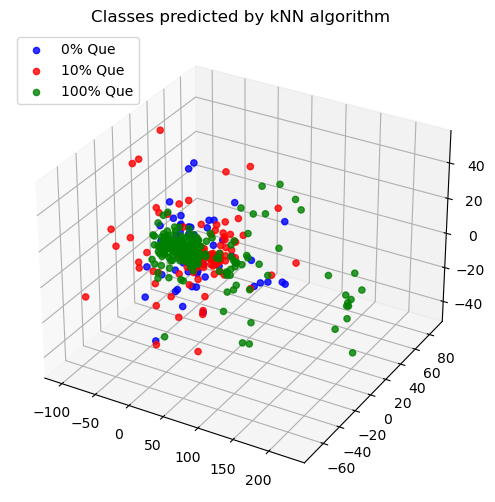

In [18]:
draw_classes_scatterplot(X_test, knn_pred, "Classes predicted by kNN algorithm", 
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Nearest Centroid

In [19]:
nc = NearestCentroid()

 CV Scores: [0.56085919 0.5645933  0.56698565 0.52631579]
 CV Mean score: 0.5546884813465645
This classifier has no attribute 'predict_proba' 


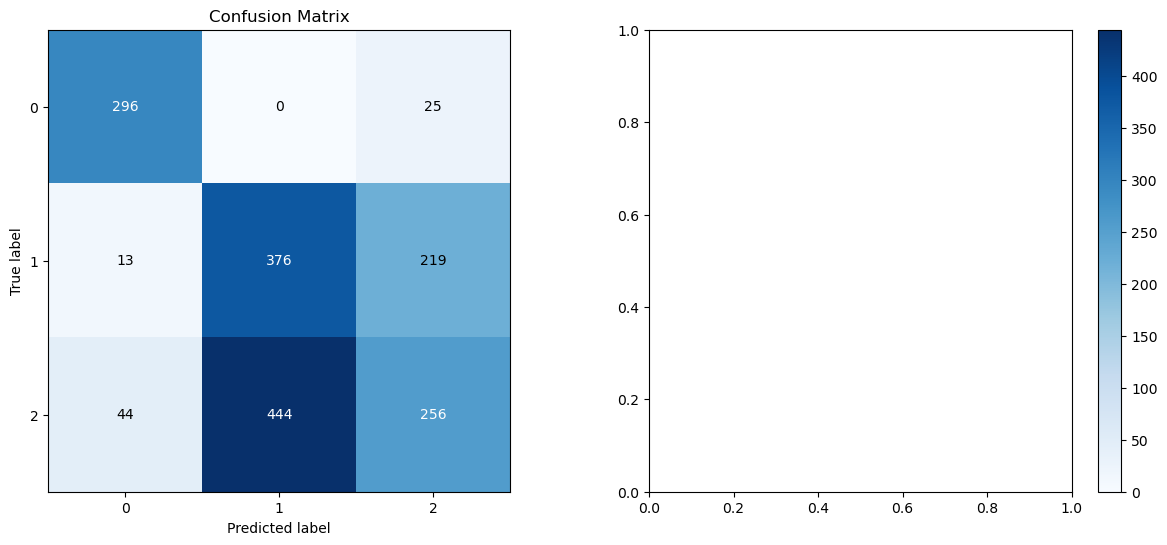

In [20]:
test_model(nc, X_train, y_train)

In [21]:
nc.fit(X_train, y_train)

NearestCentroid()

In [22]:
nc_pred = nc.predict(X_test)

In [23]:
f1_score(nc_pred, y_test, average='weighted')

0.5866676283144063

In [24]:
accuracy_score(nc_pred, y_test)

0.5775656324582339

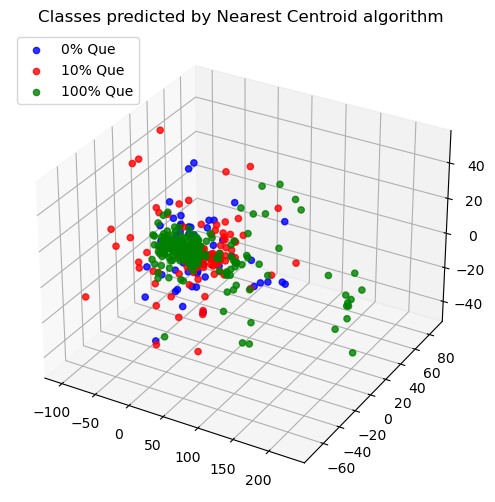

In [25]:
draw_classes_scatterplot(X_test, knn_pred, "Classes predicted by Nearest Centroid algorithm", 
                        ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])